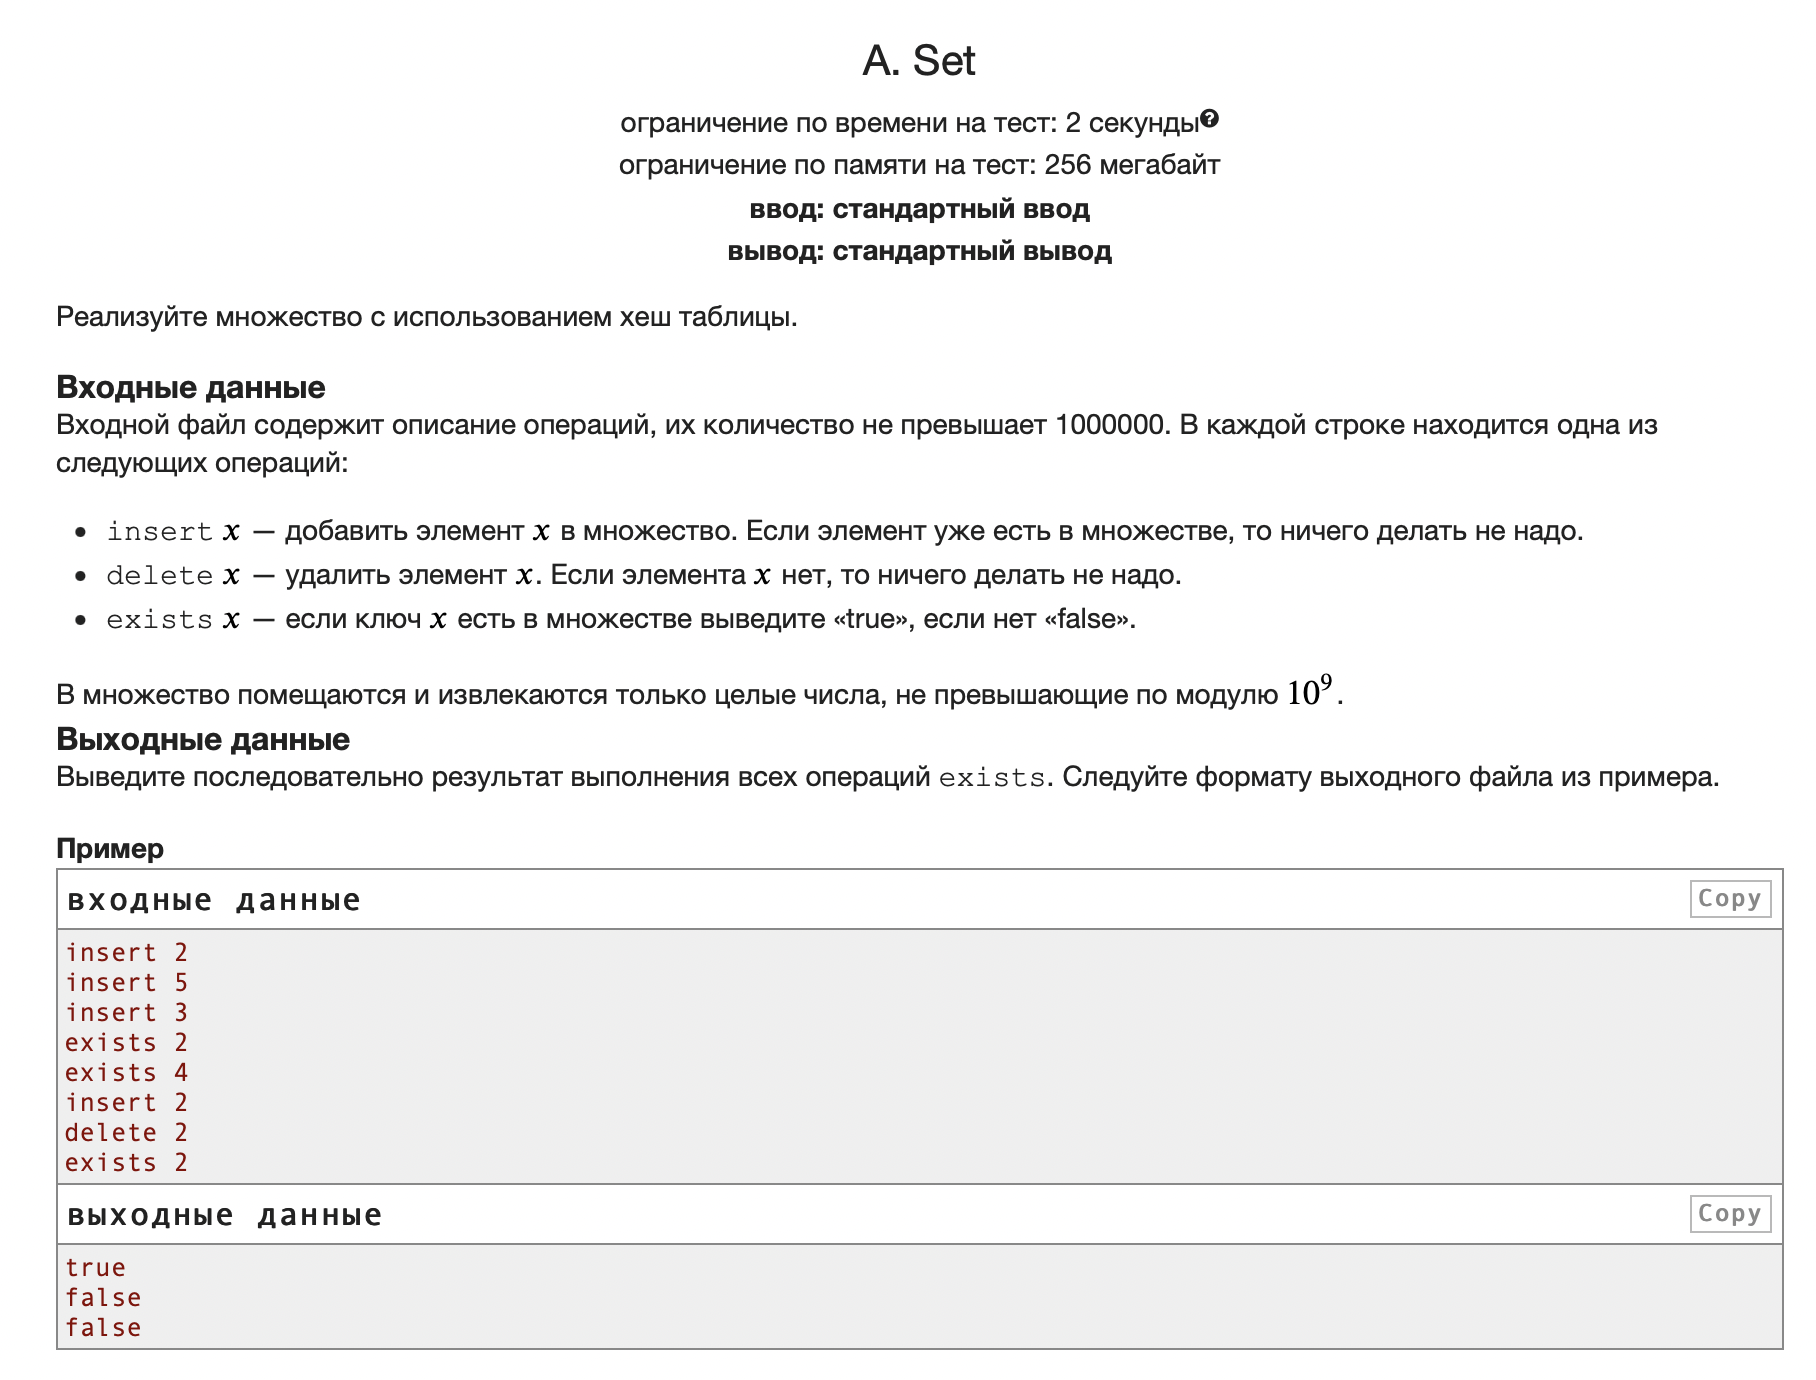

In [144]:
import random
import sys


class HashMap:
    A_COEFS = [i for i in range(1, 60, 3)]
    P = int(1e9 + 7)
    EXPAND_FACTOR = 2
    EMPTY_NAME = 'RIP'

    def __init__(self, capacity=4):
        self.A = self._select_A()
        self.init_capacity = capacity
        self.M = HashMap.EXPAND_FACTOR * self.init_capacity
        self.arr = [None] * self.M
        self.size = 0
        self.rip_cnt = 0

    def _hash(self, x):
        return ((self.A * x) % HashMap.P) % self.M

    @staticmethod
    def _select_A():
        return random.choice(HashMap.A_COEFS)

    def _next(self, indx):
        return (indx + 1) % self.M

    def _rehash(self):
        real_size = self.size - self.rip_cnt
        if (2 * real_size * HashMap.EXPAND_FACTOR < self.M and
                self.M > HashMap.EXPAND_FACTOR * self.init_capacity):
            self._new_hash(self.M // HashMap.EXPAND_FACTOR)
        else:
            self._new_hash(self.M * HashMap.EXPAND_FACTOR)

    def _new_hash(self, new_M):
        self.M = new_M
        self.A = self._select_A()
        self.size = 0
        self.rip_cnt = 0
        old_arr = self.arr.copy()
        self.arr = [None] * self.M
        for elem in old_arr:
            if elem and elem[0] != HashMap.EMPTY_NAME:
                self.put(*elem)

    def put(self, key, val):
        if self.size * HashMap.EXPAND_FACTOR > self.M:
            self._rehash()
        hash_key = self._hash(key)
        while self.arr[hash_key] is not None:
            if self.arr[hash_key][0] == key:
                return
            hash_key = self._next(hash_key)
        self.arr[hash_key] = (key, val)
        self.size += 1

    def contains(self, key):
        hash_key = self._hash(key)
        while self.arr[hash_key] is not None:
            if self.arr[hash_key][0] == key:
                return 'true'
            hash_key = self._next(hash_key)
        return 'false'

    def delete(self, key):
        hash_key = self._hash(key)
        while self.arr[hash_key] is not None:
            if self.arr[hash_key][0] == key:
                self.arr[hash_key] = (HashMap.EMPTY_NAME, None)
                self.rip_cnt += 1
                break
            hash_key = self._next(hash_key)


class MySet(HashMap):

    def __call__(self, operation, elem):
        if operation == 'insert':
            super().put(elem, elem)
        elif operation == 'delete':
            super().delete(elem)
        else:
            print(super().contains(elem))


my_set = MySet()
for line in sys.stdin:
    command, value = line.split()
    my_set(command, int(value))

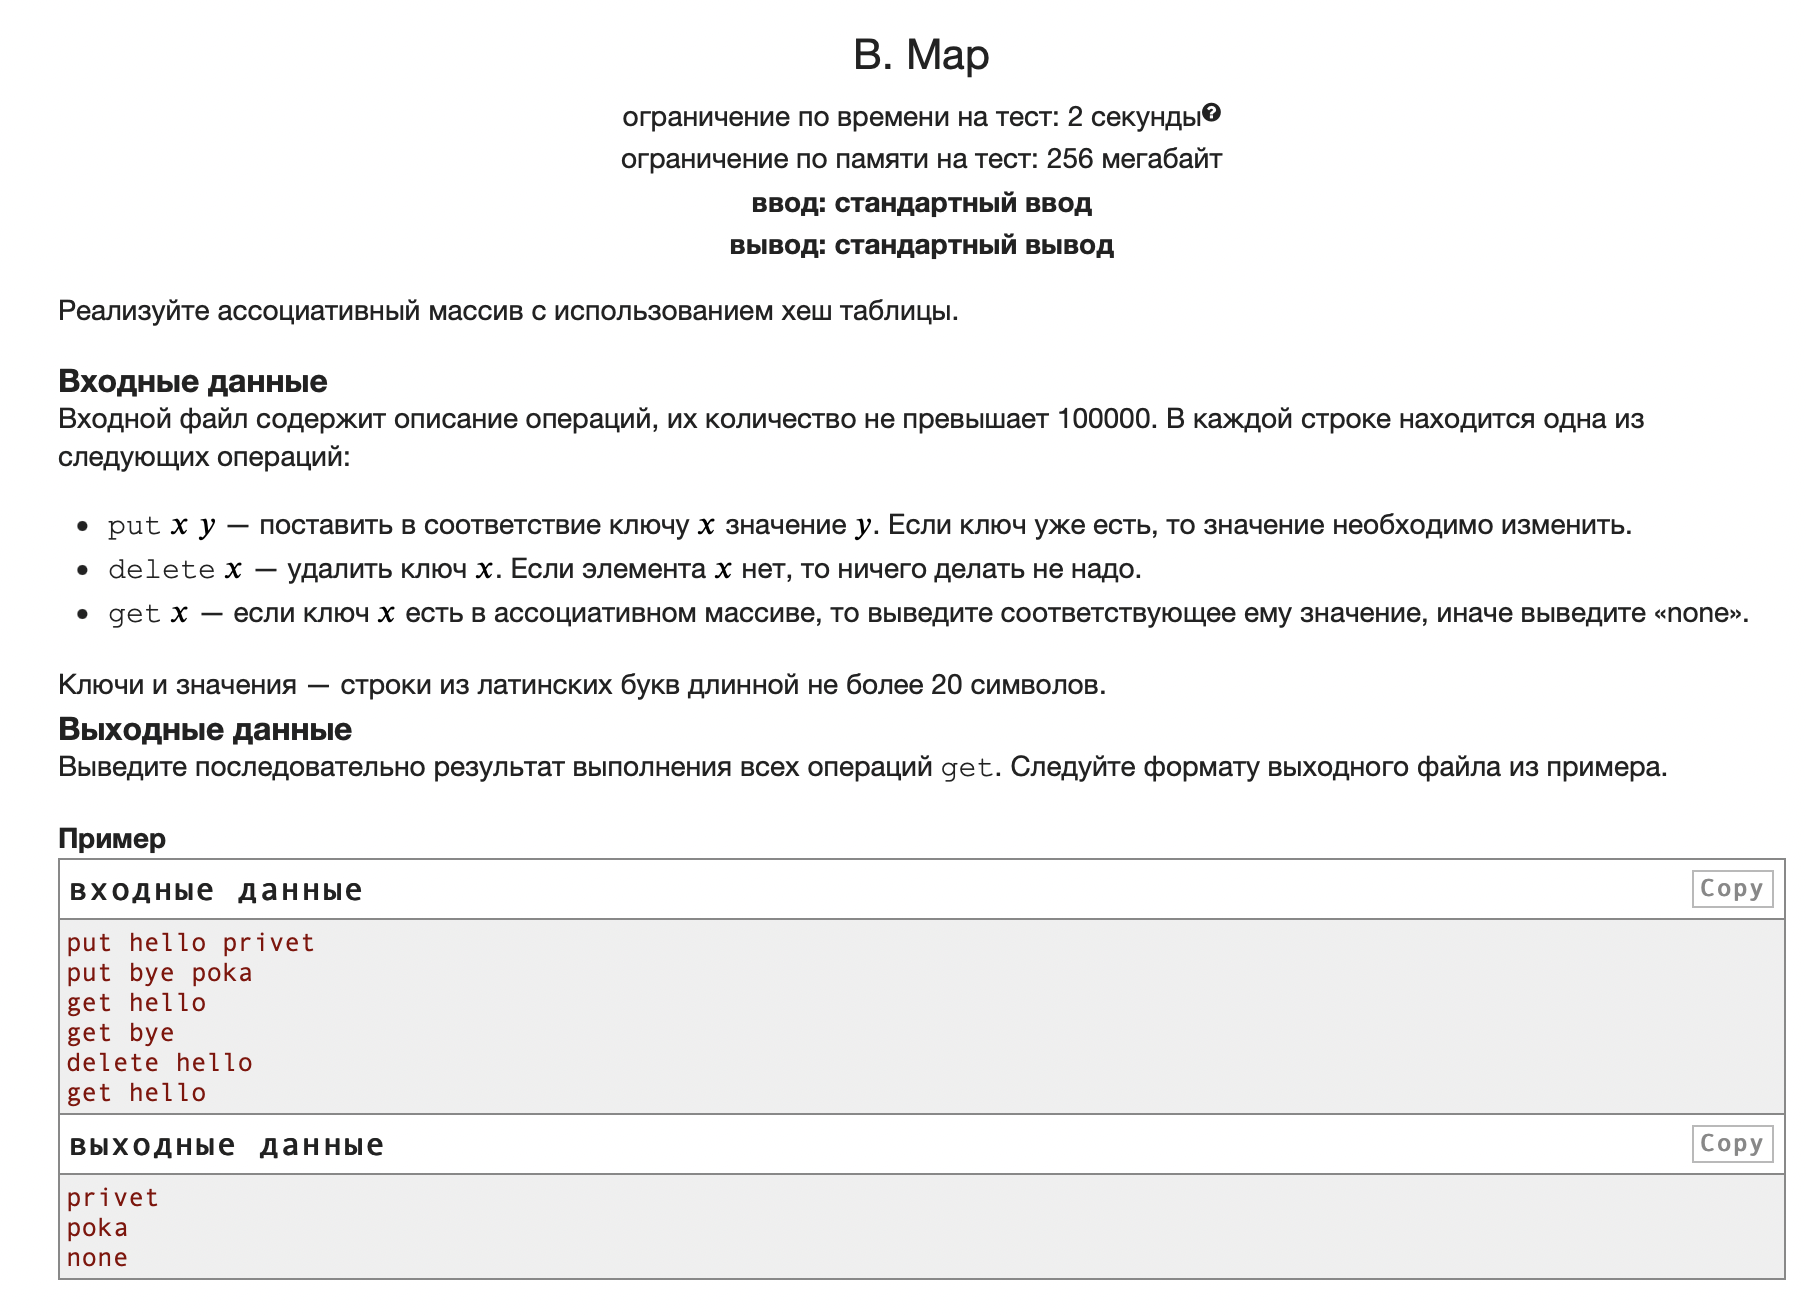

In [162]:
import sys


class Node:
    def __init__(self, key, val, next_node=None):
        self.key = key
        self.val = val
        self.next_node = next_node


class HashMap:
    A = 31
    P = int(1e9 + 7)
    M = int(1e5)
    MIN_ORD = ord('a')

    def __init__(self):
        self.arr = [None] * HashMap.M

    def _hash(self, string):
        h = self._get_ord(string[0])
        for letter in string[1:]:
            h = (h * HashMap.A) % HashMap.P
            h = (h + self._get_ord(letter)) % HashMap.P
        return h % HashMap.M

    @staticmethod
    def _get_ord(letter):
        return ord(letter) - HashMap.MIN_ORD + 1

    def _get_elem(self, key, return_prev=False):
        hash_key = self._hash(key)
        elem = self.arr[hash_key]
        prev_elem = None

        if elem is None:
            return None
        if elem.key == key:
            if return_prev:
                return (prev_elem, elem)
            return elem

        while elem.next_node:
            prev_elem = elem
            elem = elem.next_node
            if elem.key == key:
                if return_prev:
                    return (prev_elem, elem)
                return elem
        return None

    def put(self, key, val):
        elem = self._get_elem(key)
        if elem is not None:
            elem.val = val
        else:
            new_elem = Node(key, val)
            hash_key = self._hash(key)
            new_elem.next_node = self.arr[hash_key]
            self.arr[hash_key] = new_elem

    def get(self, key):
        elem = self._get_elem(key)
        if elem:
            return elem.val
        return None

    def delete(self, key):
        elems = self._get_elem(key, return_prev=True)
        if elems:
            if elems[0]:
                elems[0].next_node = elems[1].next_node
            else:
                self.arr[self._hash(key)] = elems[1].next_node
                

class MyMap(HashMap):

    def __call__(self, operation, *args):
        if operation == 'put':
            super().put(*args)
        elif operation == 'delete':
            super().delete(*args)
        else:
            result = super().get(*args)
            if result is not None:
                print(result)
            else:
                print('none')


my_map = MyMap()
for line in sys.stdin:
    my_map(*line.split())

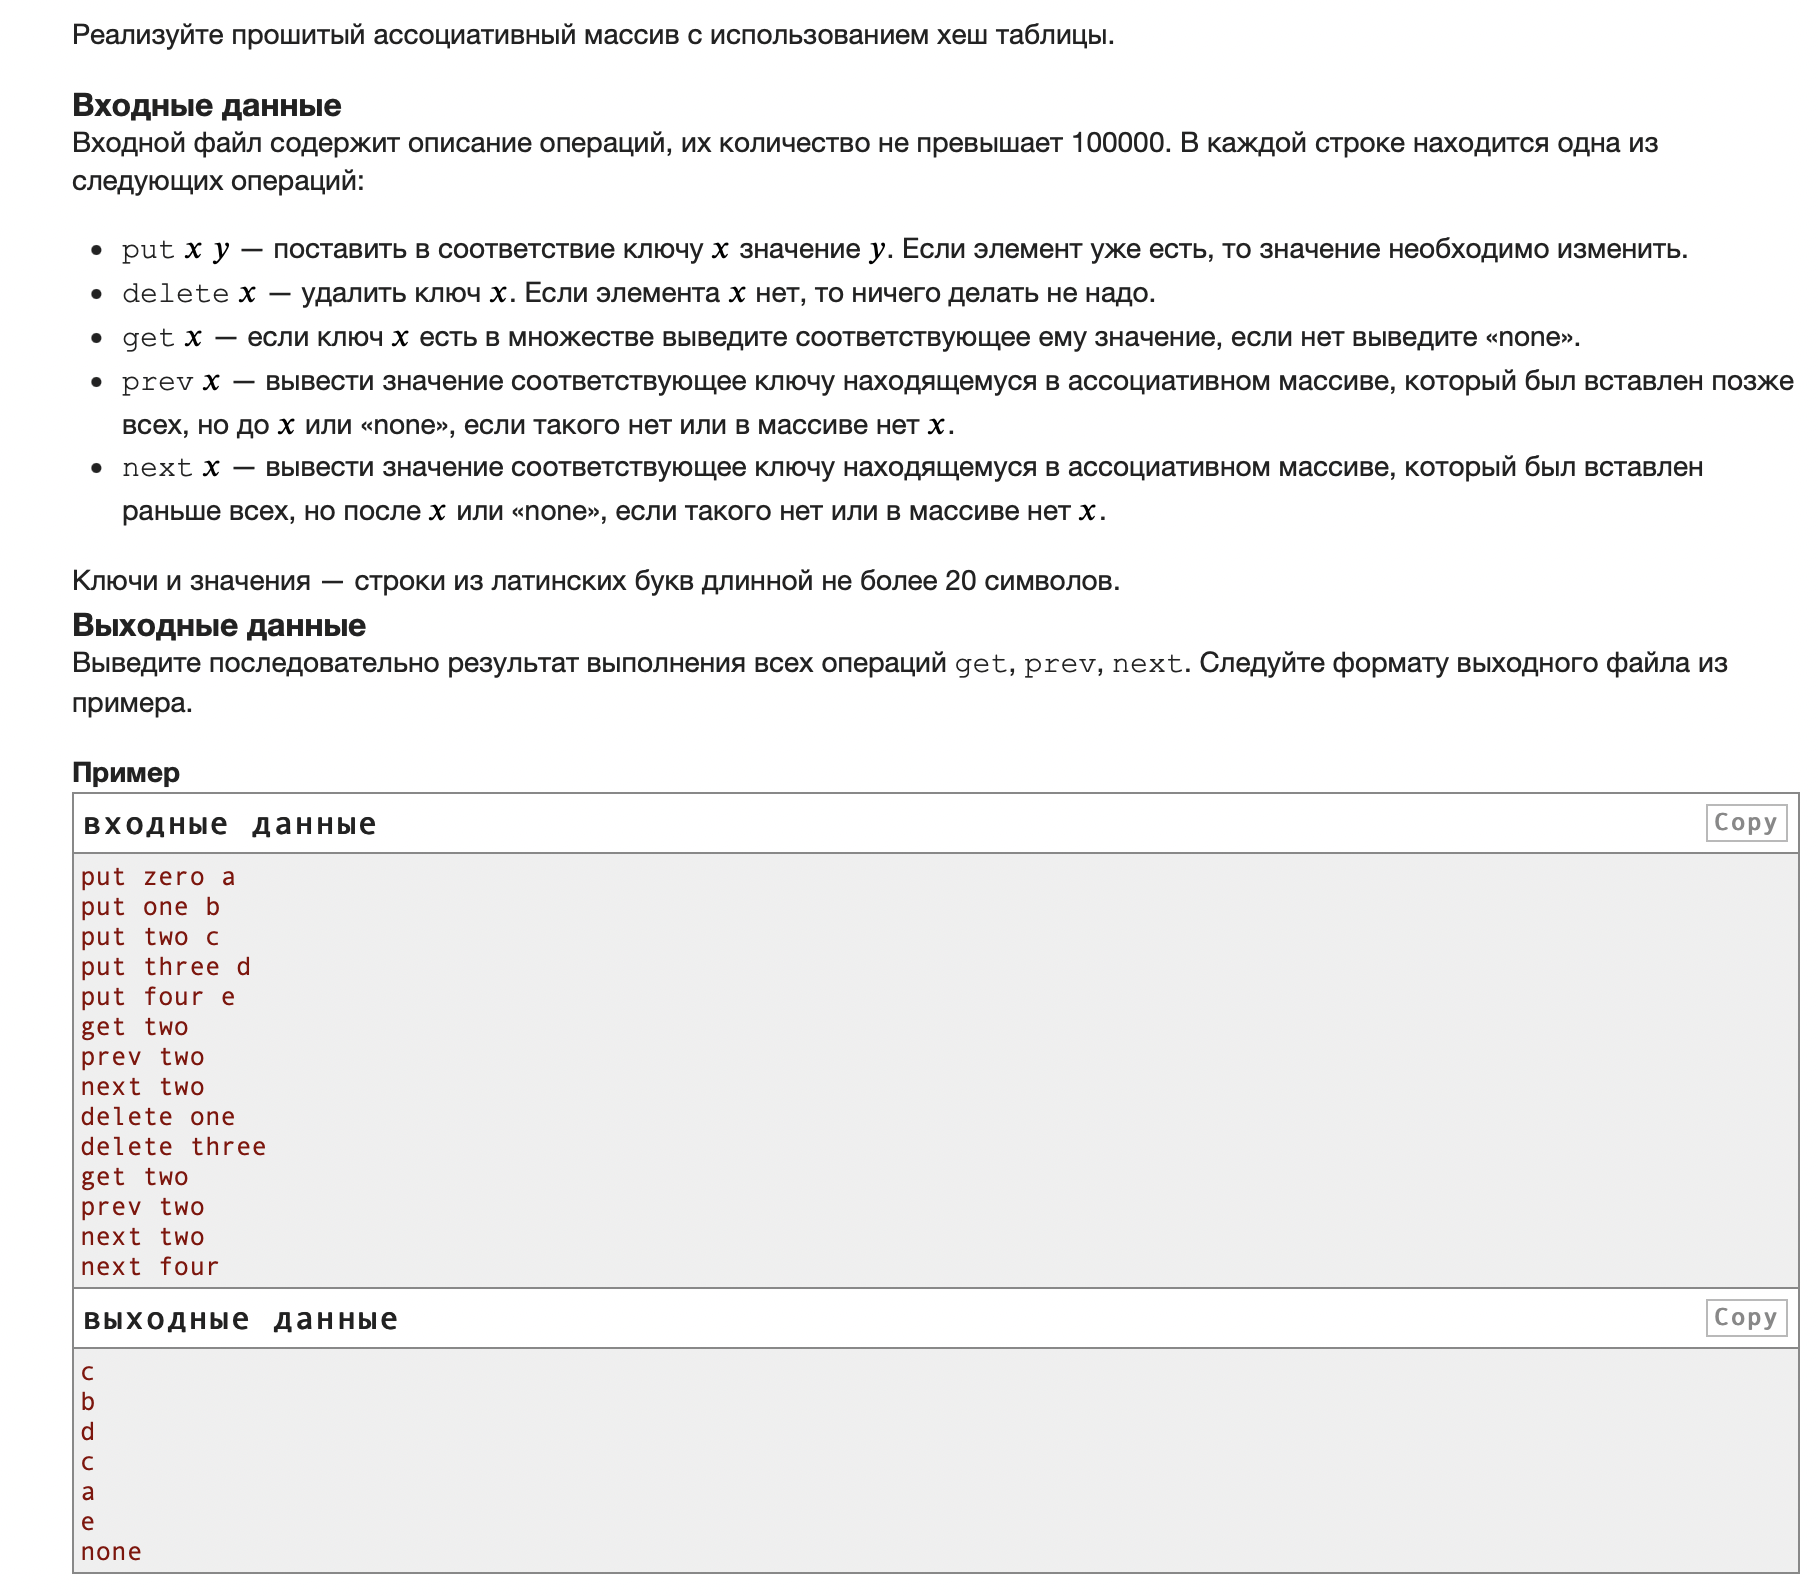

In [18]:
import sys


class Node:
    def __init__(self, key, val, next_node=None, prev_added=None, next_added=None):
        self.key = key
        self.val = val
        self.next_node = next_node
        self.prev_added = prev_added
        self.next_added = next_added


class HashMap:
    A = 31
    P = int(1e9 + 7)
    M = int(1e5)
    MIN_ORD = ord('a')

    def __init__(self):
        self.arr = [None] * HashMap.M
        self.last_added = None

    def _hash(self, string):
        h = self._get_ord(string[0])
        for letter in string[1:]:
            h = (h * HashMap.A) % HashMap.P
            h = (h + self._get_ord(letter)) % HashMap.P
        return h % HashMap.M

    @staticmethod
    def _get_ord(letter):
        return ord(letter) - HashMap.MIN_ORD + 1

    def _get_elem(self, key, return_prev=False):
        hash_key = self._hash(key)
        elem = self.arr[hash_key]
        prev_elem = None

        if elem is None:
            return None
        if elem.key == key:
            if return_prev:
                return (prev_elem, elem)
            return elem

        while elem.next_node:
            prev_elem = elem
            elem = elem.next_node
            if elem.key == key:
                if return_prev:
                    return (prev_elem, elem)
                return elem
        return None

    def put(self, key, val):
        elem = self._get_elem(key)
        if elem is not None:
            elem.val = val
        else:
            new_elem = Node(key, val, prev_added=self.last_added)
            if self.last_added:
                self.last_added.next_added = new_elem
            self.last_added = new_elem

            hash_key = self._hash(key)
            new_elem.next_node = self.arr[hash_key]
            self.arr[hash_key] = new_elem

    def get(self, key):
        elem = self._get_elem(key)
        if elem:
            return elem.val
        return None

    def delete(self, key):
        elems = self._get_elem(key, return_prev=True)
        if elems:
            if elems[1].next_added:
                elems[1].next_added.prev_added = elems[1].prev_added
            if elems[1].prev_added:
                elems[1].prev_added.next_added = elems[1].next_added

            if elems[1] is self.last_added:
                self.last_added = elems[1].prev_added

            if elems[0]:
                elems[0].next_node = elems[1].next_node
            else:
                self.arr[self._hash(key)] = elems[1].next_node

    def prev_elem(self, key):
        elem = self._get_elem(key)
        if elem and elem.prev_added:
            return elem.prev_added.val
        return None

    def next_elem(self, key):
        elem = self._get_elem(key)
        if elem and elem.next_added:
            return elem.next_added.val
        return None


class LinkedMap(HashMap):

    @staticmethod
    def _print_val(val):
        if val:
            print(val)
        else:
            print('none')

    def __call__(self, operation, *args):
        if operation == 'put':
            super().put(*args)
        elif operation == 'delete':
            super().delete(*args)
        elif operation == 'get':
            result = super().get(*args)
            self._print_val(result)
        elif operation == 'prev':
            result = super().prev_elem(*args)
            self._print_val(result)
        else:
            result = super().next_elem(*args)
            self._print_val(result)


linked_map = LinkedMap()
for line in sys.stdin:
    linked_map(*line.split())

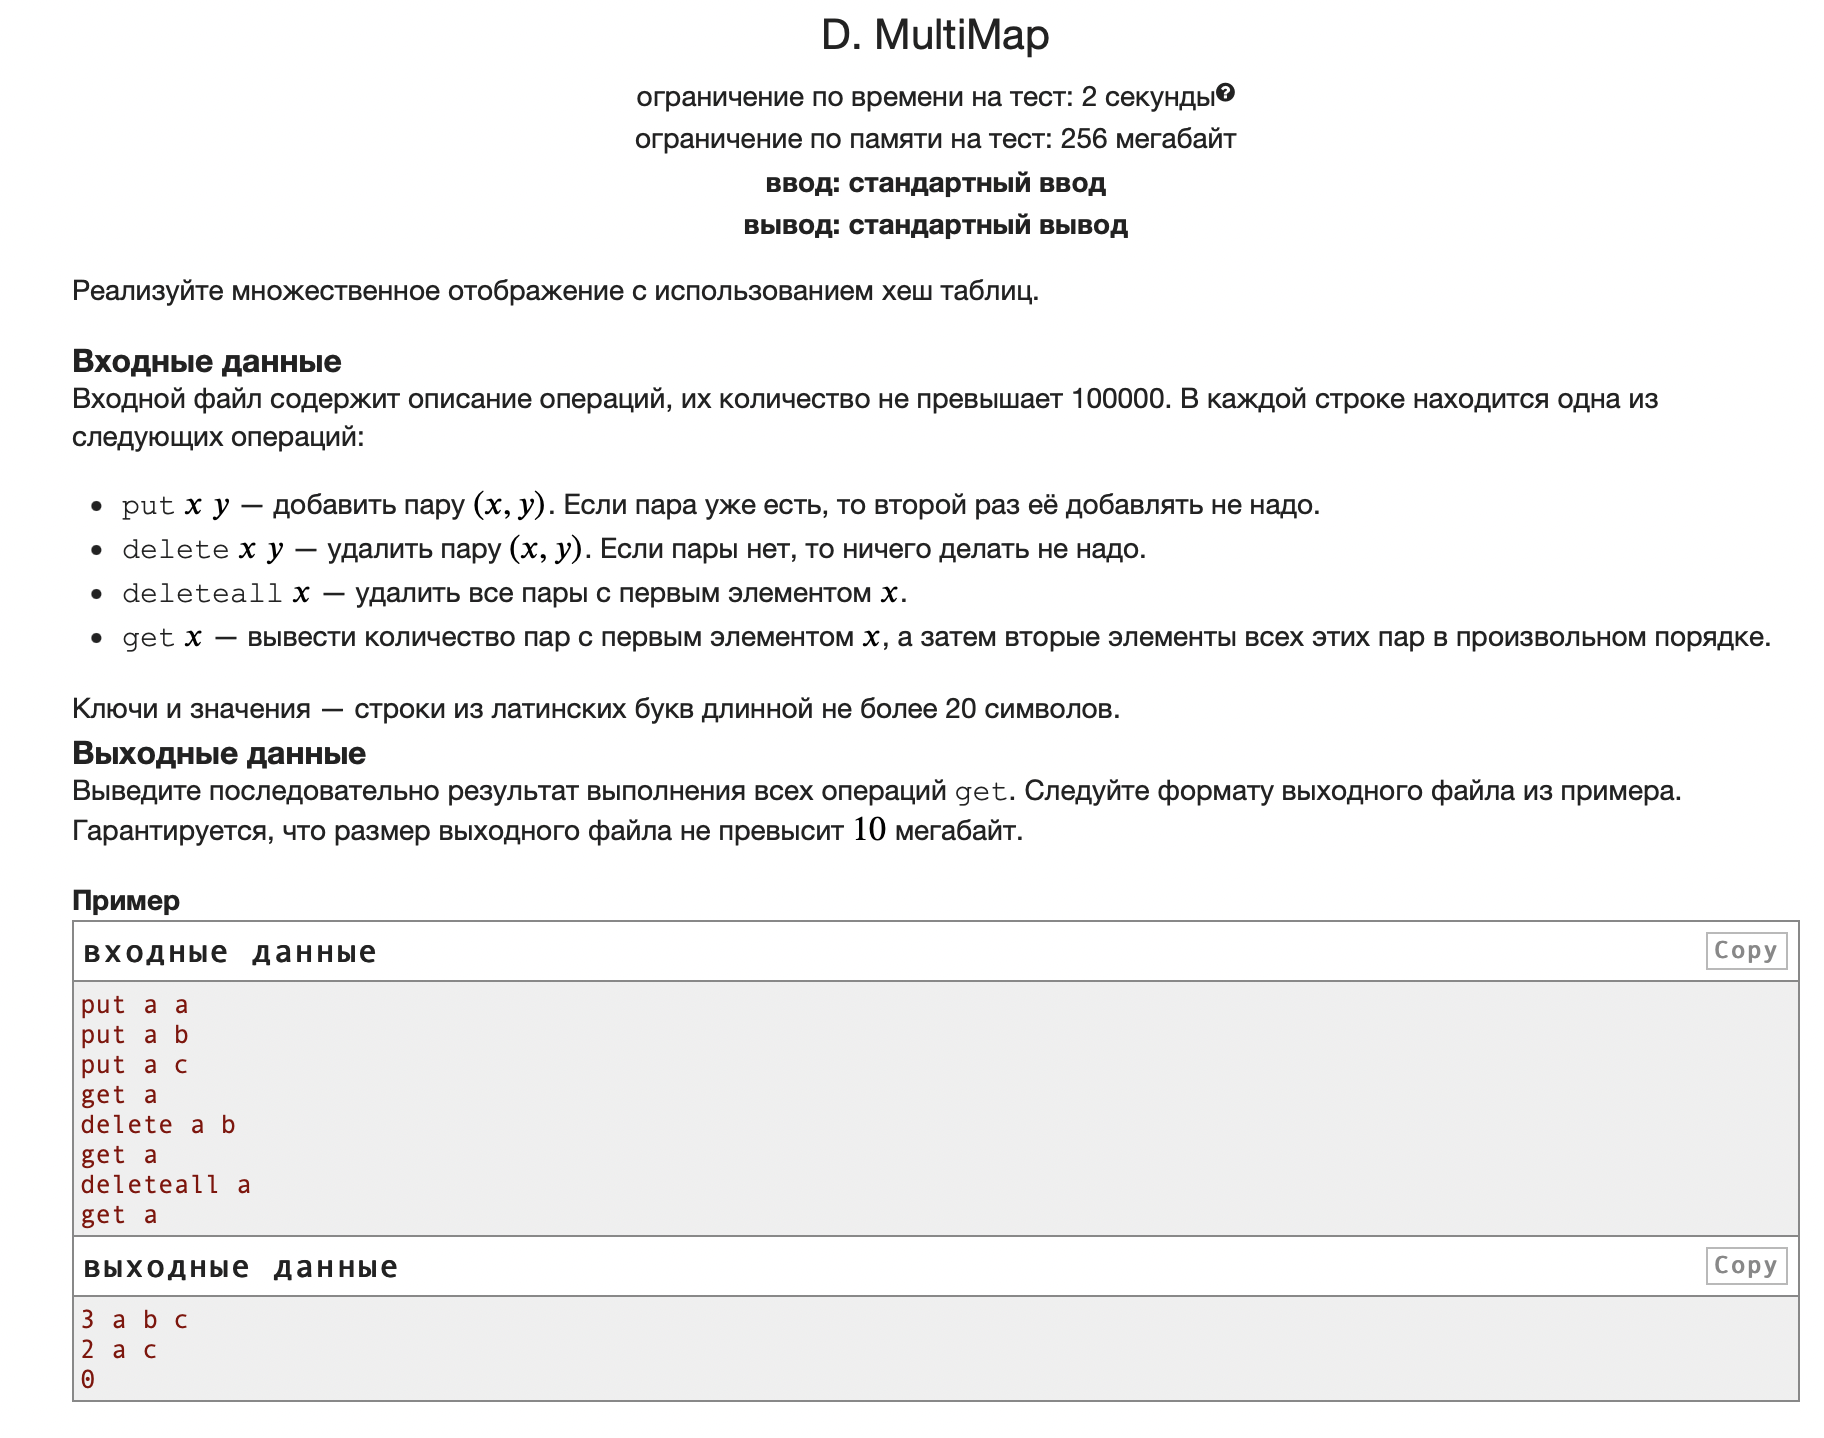

In [ ]:
import sys


class Node:
    def __init__(self, key_1, key_2, next_node=None):
        self.key = key
        self.val = val
        self.next_node = next_node


class HashMap:
    A = 31
    P = int(1e9 + 7)
    M = int(1e5)
    MIN_ORD = ord('a')

    def __init__(self):
        self.arr_2d = [[None] * HashMap.M] * HashMap.M

    def _hash(self, string):
        h = self._get_ord(string[0])
        for letter in string[1:]:
            h = (h * HashMap.A) % HashMap.P
            h = (h + self._get_ord(letter)) % HashMap.P
        return h % HashMap.M

    @staticmethod
    def _get_ord(letter):
        return ord(letter) - HashMap.MIN_ORD + 1

    def _get_elem(self, key_1, key_2, return_prev=False):
        hash_key_1 = self._hash(key_1)
        hash_key_2 = self._hash(key_2)
        elem = self.arr[hash_key_1][hash_key_2]
        prev_elem = None

        if elem is None:
            return None
        if elem.key_1 == key_1 and elem.key_2 == key_2:
            if return_prev:
                return (prev_elem, elem)
            return elem

        while elem.next_node:
            prev_elem = elem
            elem = elem.next_node
            if elem.key_1 == key_1 and elem.key_2 == key_2:
                if return_prev:
                    return (prev_elem, elem)
                return elem
        return None

    def put(self, key_1, key_2):
        elem = self._get_elem(key_1, key_2)
        if elem is None:
            new_elem = Node(key_1, key_2)
            hash_key_1 = self._hash(key_1)
            hash_key_2 = self._hash(key_2)
            new_elem.next_node = self.arr[hash_key_1][hash_key_2]
            self.arr[hash_key_1][hash_key_2] = new_elem

    def get(self, key):
        elems = self.arr[self._hash(key)]
        if elem is None:
            return []
        key_elem = []
        for elem in elems:
            if elem.key_1 == key:
                key_elem.append(elem.key_2)
            while elem.next_node:
                elem = elem.next_node
                if elem.key_1 == key:
                    key_elem.append(elem.key_2)
        return key_elem

    def delete(self, key_1, key_2):
        elems = self._get_elem(key_1, key_2, return_prev=True)
        if elems:
            if elems[0]:
                elems[0].next_node = elems[1].next_node
            else:
                self.arr[self._hash(key_1)][self._hash(key_2)] = elems[1].next_node

    def delete_all(self, key):
        elems = self.arr[self._hash(key)]
        if elem is not:
                

class MyMap(HashMap):

    def __call__(self, operation, *args):
        if operation == 'put':
            super().put(*args)
        elif operation == 'delete':
            super().delete(*args)
        else:
            result = super().get(*args)
            if result is not None:
                print(result)
            else:
                print('none')


my_map = MyMap()
for line in sys.stdin:
    my_map(*line.split())